In [5]:
import pandas as pd
import os

# 读取CSV文件

data = pd.read_csv('listings.csv', encoding='ISO-8859-1', dtype={68: str})


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87946 entries, 0 to 87945
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            87946 non-null  int64  
 1   listing_url                                   87946 non-null  object 
 2   scrape_id                                     87946 non-null  int64  
 3   last_scraped                                  87946 non-null  object 
 4   source                                        87946 non-null  object 
 5   name                                          87946 non-null  object 
 6   description                                   86679 non-null  object 
 7   neighborhood_overview                         47190 non-null  object 
 8   picture_url                                   87943 non-null  object 
 9   host_id                                       87946 non-null 

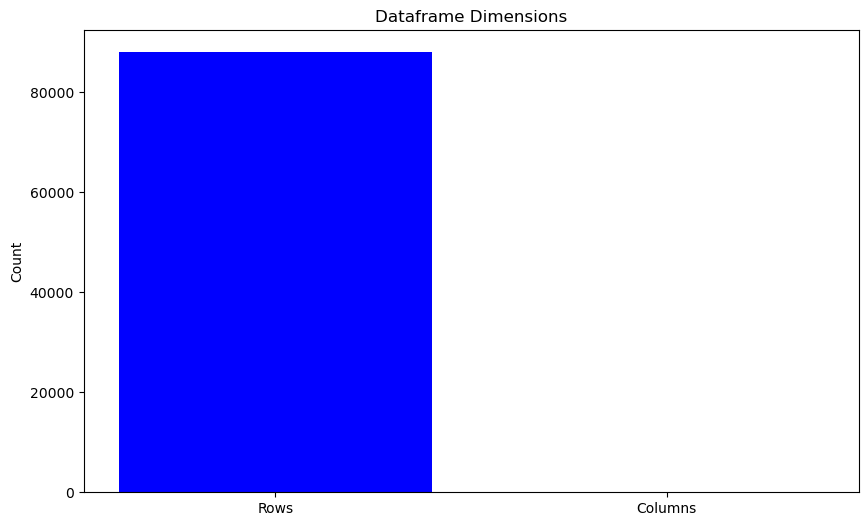

In [7]:
import matplotlib.pyplot as plt

# 计算数据框的尺寸
df_shape = data.shape
n_rows = df_shape[0]
n_columns = df_shape[1]

# 创建表示数据框大小的图表
plt.figure(figsize=(10, 6))
plt.bar(['Rows', 'Columns'], [n_rows, n_columns], color=['blue', 'green'])
plt.title('Dataframe Dimensions')
plt.ylabel('Count')
plt.show()


In [8]:
import seaborn as sns


In [9]:
print(data.columns.tolist())


['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [10]:
#数据清洗step1
#查看每列缺失值个数并按照降序排序
print(data.shape)
data.loc[:, data.isnull().sum() > 0].isnull().sum().sort_values(ascending=False)

(87946, 75)


bathrooms                       87946
calendar_updated                87946
neighbourhood_group_cleansed    87946
license                         87945
host_about                      42040
neighborhood_overview           40756
neighbourhood                   40755
host_neighbourhood              39867
bedrooms                        32774
host_response_time              28918
host_response_rate              28918
host_acceptance_rate            25188
review_scores_value             23126
review_scores_checkin           23125
review_scores_location          23125
review_scores_communication     23095
review_scores_accuracy          23093
review_scores_cleanliness       23081
review_scores_rating            22158
last_review                     22158
first_review                    22158
reviews_per_month               22158
host_location                   18778
description                      1267
beds                             1134
host_is_superhost                 932
bathrooms_te

In [11]:
#数据清洗step2：查看每列内容为0或基本无变化的列
data.loc[:, data.nunique() <= 1].nunique().sort_values()

neighbourhood_group_cleansed    0
bathrooms                       0
calendar_updated                0
scrape_id                       1
license                         1
dtype: int64

In [120]:
# 根据以上两个数据清洗代码，删除不需要的列
data.drop(columns=['scrape_id', 'calendar_updated', 'neighbourhood_group_cleansed', 'license', 'bathrooms'], inplace=True)

In [121]:
#过滤掉last review在2019年以前的行
# 确保 'last_review' 列是日期时间格式
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')

# 过滤掉 'last_review' 中年份小于2019的行
data = data[data['last_review'].dt.year >= 2019]

# 显示过滤后的数据框的前几行以确认操作
data.head()


,id,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry,weighted_score,satisfaction_level,review_period_years,reviews_per_day
0,92644.0,https://www.airbnb.com/rooms/92644,2023/9/6,city scrape,Rental unit in Earlsfield ÃÂÃÂÃÂÃÂ· _4....,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201.0,https://www.airbnb.com/users/show/498201,...,1.0,0.0,1.0,0.0,1.45,POINT (526073.4740501984 173004.387252359),4.680000,4,11.356605,0.087649
1,93015.0,https://www.airbnb.com/rooms/93015,2023/9/6,city scrape,Rental unit in Hammersmith ÃÂÃÂÃÂÃÂ· _4...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704.0,https://www.airbnb.com/users/show/499704,...,1.0,1.0,0.0,0.0,0.27,POINT (523854.0349835005 179394.7073471978),4.796111,4,10.661191,0.089108
2,13913.0,https://www.airbnb.com/rooms/13913,2023/9/6,city scrape,Rental unit in Islington ÃÂÃÂÃÂÃÂ· _4.8...,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730.0,https://www.airbnb.com/users/show/54730,...,2.0,1.0,1.0,0.0,0.26,POINT (530901.0129731526 187213.78735344484),4.728333,4,12.314853,0.009248
3,15400.0,https://www.airbnb.com/rooms/15400,2023/9/6,city scrape,Rental unit in London ÃÂÃÂÃÂÃÂ· _4.80 Ã...,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302.0,https://www.airbnb.com/users/show/60302,...,1.0,1.0,0.0,0.0,0.56,POINT (527284.5759972009 178129.67860620335),4.854444,4,13.357974,0.096397
4,17402.0,https://www.airbnb.com/rooms/17402,2023/9/6,city scrape,Rental unit in London ÃÂÃÂÃÂÃÂ· _4.76 Ã...,"You'll have a great time in this beautiful, cl...","Fitzrovia is a very desirable trendy, arty and...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564.0,https://www.airbnb.com/users/show/67564,...,9.0,9.0,0.0,0.0,0.36,POINT (529075.7899307094 181974.86478122626),4.749444,4,11.665982,0.015429


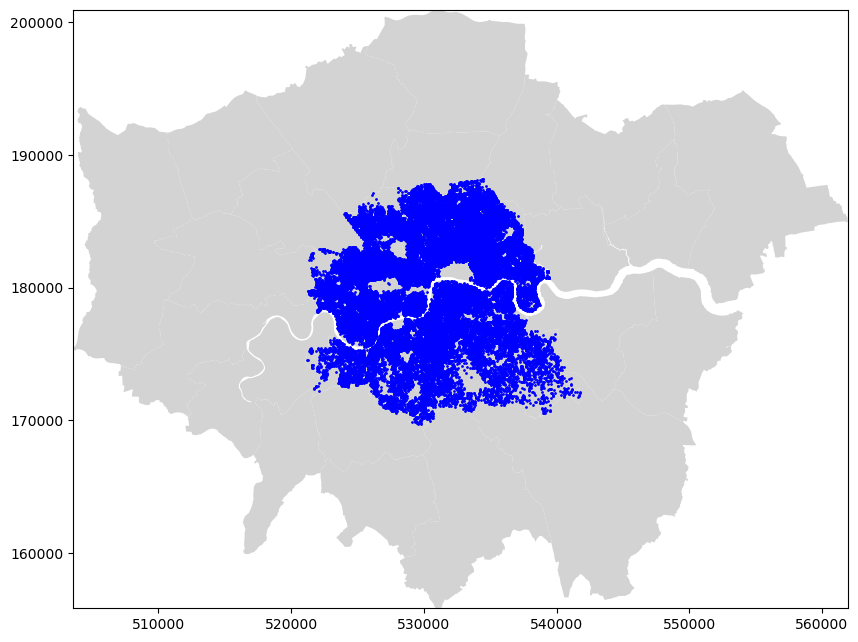

In [99]:
#选取Inner London
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# 读取伦敦区域的GeoPackage文件
gdf_boroughs = gpd.read_file('Boroughs.gpkg', layer='boroughs')

# 读取包含经纬度的CSV文件
data = pd.read_csv('listings.csv', encoding='ISO-8859-1')

# 创建点的地理数据
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
gdf_points = gpd.GeoDataFrame(data, geometry=geometry)

# 确保点的CRS与区域的CRS相同
gdf_points.crs = "EPSG:4326"  # 假设原始点数据是WGS84
data = gdf_points.to_crs(gdf_boroughs.crs)

# 绘图
fig, ax = plt.subplots(figsize=(10, 10))
gdf_boroughs.plot(ax=ax, color='lightgrey')

# 仅在选定区域内绘制点Inner London
#selected_boroughs = ['Camden', 'Westminster', 'Kensington and Chelsea']# 示例区域名称
selected_boroughs = [
    'Camden', 
    'Hackney', 
    'Hammersmith and Fulham', 
    'Islington', 
    'Kensington and Chelsea', 
    'Lambeth', 
    'Lewisham', 
    'Southwark', 
    'Tower Hamlets', 
    'Wandsworth', 
    'Westminster'
]

# 创建一个指示每个点是否位于选定区的布尔序列
in_selected_borough = data.apply(lambda x: any(borough.contains(x.geometry) for borough in gdf_boroughs[gdf_boroughs['NAME'].isin(selected_boroughs)].geometry), axis=1)

# 绘制在选定区域内的点
data[in_selected_borough].plot(ax=ax, color='blue', markersize=1)

# 调整坐标轴的显示范围
ax.set_xlim(gdf_boroughs.total_bounds[0], gdf_boroughs.total_bounds[2])
ax.set_ylim(gdf_boroughs.total_bounds[1], gdf_boroughs.total_bounds[3])

# 显示地图
plt.show()


In [122]:
# 用过滤后的数据覆盖原有的 DataFrame
data = data[in_selected_borough].copy()

# 覆盖保存原有的 CSV 文件
data.to_csv('listings.csv', index=False)


/tmp/ipykernel_74379/1207050946.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[in_selected_borough].copy()


In [123]:
# 删除之后满意度评级和热度评级中包含缺失值的行
columns_to_check = [
    'review_scores_accuracy', 
    'review_scores_cleanliness', 
    'review_scores_checkin', 
    'review_scores_communication', 
    'review_scores_location', 
    'review_scores_value',
    'last_review',
    'first_review',
    'number_of_reviews',
    'availability_365'
]

# 删除这些列中含有缺失值的行
data = data.dropna(subset=columns_to_check)


In [137]:
#维度1：客户满意度
#加权依据：https://medium.com/@labdmitriy/exploring-airbnb-guest-reviews-in-london-682b45aba34e中问题1和问题2的结论
# 定义加权平均的权重
weights = {
    'review_scores_accuracy': 1.5,
    'review_scores_cleanliness': 1,
    'review_scores_checkin': 1.5,
    'review_scores_communication': 1.5,
    'review_scores_location': 2.0,
    'review_scores_value': 1.5
}

# 定义评分列的列表
score_columns = [
    'review_scores_accuracy', 
    'review_scores_cleanliness', 
    'review_scores_checkin', 
    'review_scores_communication', 
    'review_scores_location', 
    'review_scores_value'
]
 #将评分列转换为浮点数
for col in score_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # 将无法转换的值设置为 NaN

# 计算加权平均分的函数
def weighted_average(row):
    total_score = sum(row[col] * weights[col] for col in score_columns if not pd.isna(row[col]))
    total_weight = sum(weights[col] for col in score_columns if not pd.isna(row[col]))
    return total_score / total_weight if total_weight > 0 else None

# 应用加权平均分计算函数
data['weighted_score'] = data.apply(weighted_average, axis=1)
sorted_data_descending = data.sort_values(by='weighted_score',ascending=False)

# 定义满意度等级的函数
def satisfaction_level(weighted_score):
    if weighted_score >= sorted_data_descending.weighted_score.quantile(0.80) :
        return 5
    elif weighted_score >= sorted_data_descending.weighted_score.quantile(0.60):
        return 4
    elif weighted_score >= sorted_data_descending.weighted_score.quantile(0.40):
        return 3
    elif weighted_score >= sorted_data_descending.weighted_score.quantile(0.20):
        return 2
    else:
        return 1

# 应用满意度等级计算函数
data['satisfaction_level'] = data['weighted_score'].apply(satisfaction_level)

# 显示所有的满意度等级
#print(data['satisfaction_level'].tolist())
print(data['satisfaction_level'].value_counts())


satisfaction_level
5    6917
4    6899
1    6899
2    6897
3    6893
Name: count, dtype: int64


In [145]:
import pandas as pd

# 确保日期列是 datetime 类型
data['last_review'] = pd.to_datetime(data['last_review'])
data['first_review'] = pd.to_datetime(data['first_review'])

# 计算日期差并转换为天数
data['operating_days'] = (data['last_review'] - data['first_review']).dt.days

# 避免除以零，我们可以给分母加上一个小的数值，如 0.1，或者直接过滤掉这些行
data = data[data['operating_days'] > 0]

# 计算reviews per day，考虑不可用的天数
data['reviews_per_day'] = data['number_of_reviews'] / (data['operating_days'])

#计算月入住率
data['occupancy_rate'] = ((30 - data['availability_30']) / 30) 

# 将 occupancy_rate 和 reviews_per_day 数值相加
data['combined_value'] = data['occupancy_rate'] + data['reviews_per_day']

result_columns = ['number_of_reviews', 'operating_days', 'reviews_per_day', 'occupancy_rate', 'combined_value']
print(data[result_columns].head())

   number_of_reviews  operating_days  reviews_per_day  occupancy_rate  \
0              216.0            4148         0.052073        1.000000   
1               38.0            3894         0.009759        0.566667   
2               41.0            4498         0.009115        0.166667   
3               94.0            4879         0.019266        0.766667   
4               54.0            4261         0.012673        0.533333   

   combined_value  
0        1.052073  
1        0.576425  
2        0.175782  
3        0.785933  
4        0.546006  


In [154]:
# 根据 'host_is_superhost' 更新 'reviews_per_day_super_host' 列的值
data['super_host_rate'] = data.apply(
    lambda row: row['combined_value'] + 0.5 if row['host_is_superhost'] == 't' else row['combined_value'],
    axis=1
)

# 查看结果
print(data[['host_is_superhost', 'combined_value', 'super_host_rate']].head())

  host_is_superhost  combined_value  super_host_rate
0                 f        1.052073         1.052073
1                 f        0.576425         0.576425
2                 f        0.175782         0.175782
3                 f        0.785933         0.785933
4                 t        0.546006         1.046006


In [155]:
data['super_host_rate'].describe()

count    34505.000000
mean         0.953666
std          0.379690
min          0.000775
25%          0.773475
50%          1.012563
75%          1.112903
max          3.333333
Name: super_host_rate, dtype: float64

In [156]:
import pandas as pd
import numpy as np


# [之前的代码片段来计算 reviews_per_day 和 reviews_per_day_super_host]

# 假设使用固定数值作为阈值来分星级，这里我们需要五个阈值分成六个区间
dimension2 = data.sort_values(by='super_host_rate',ascending=False)


thresholds = [dimension2.super_host_rate.quantile(0.00),
              dimension2.super_host_rate.quantile(0.20), 
              dimension2.super_host_rate.quantile(0.40), 
              dimension2.super_host_rate.quantile(0.60), 
              dimension2.super_host_rate.quantile(0.80), 
              dimension2.super_host_rate.quantile(1.00)]  # 举例的阈值
labels = [1, 2, 3, 4, 5]  # 五个星级标签

# 分配星级
data['star_rating'] = pd.cut(data['super_host_rate'], bins=thresholds, labels=labels, include_lowest=True)



In [157]:
# 假设星级已经被计算并分配到 'star_rating' 列中
star_rating_counts = data['star_rating'].value_counts()

# 按照星级排序，如果有必要的话
star_rating_counts_sorted = star_rating_counts.sort_index()

# 打印星级个数统计
print(star_rating_counts_sorted)

star_rating
1    6901
2    6901
3    6910
4    6908
5    6885
Name: count, dtype: int64


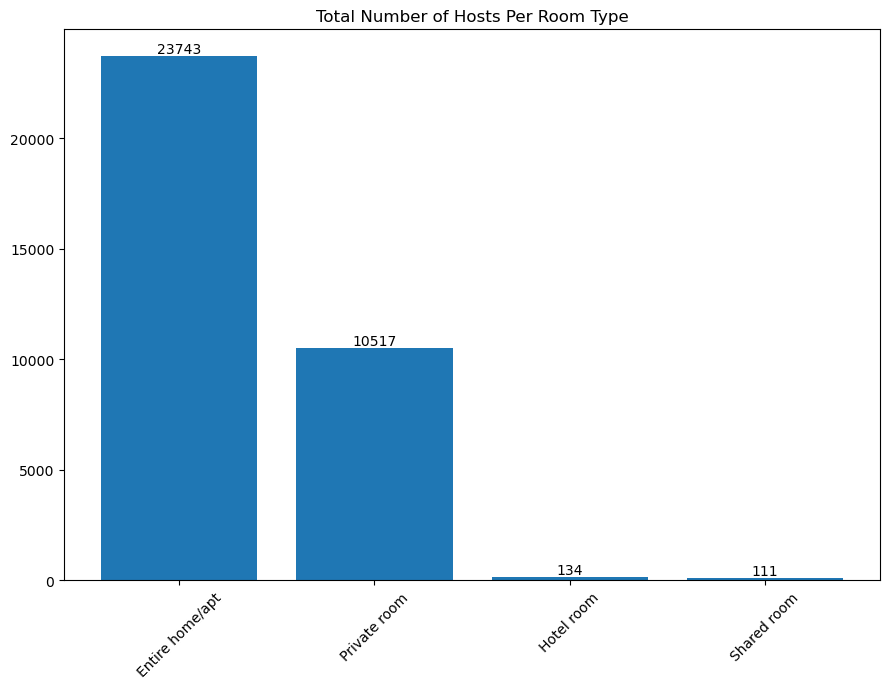

In [158]:
#第六问可以加上的图
import pandas as pd
import matplotlib.pyplot as plt

# 使用groupby计算每种房间类型的总主机数量
room_type_counts = data.groupby('room_type').size().reset_index(name='Total_Hosts')

# 按总主机数量降序排序
room_type_counts = room_type_counts.sort_values(by='Total_Hosts', ascending=False)

# 创建柱状图
plt.figure(figsize=(9, 7))
plt.bar(room_type_counts['room_type'], room_type_counts['Total_Hosts'])

# 添加数据标签
for index, row in room_type_counts.iterrows():
    plt.text(row['room_type'], row['Total_Hosts'], str(row['Total_Hosts']), ha='center', va='bottom')

# 设置图表标题
plt.title("Total Number of Hosts Per Room Type")

# 显示图表
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


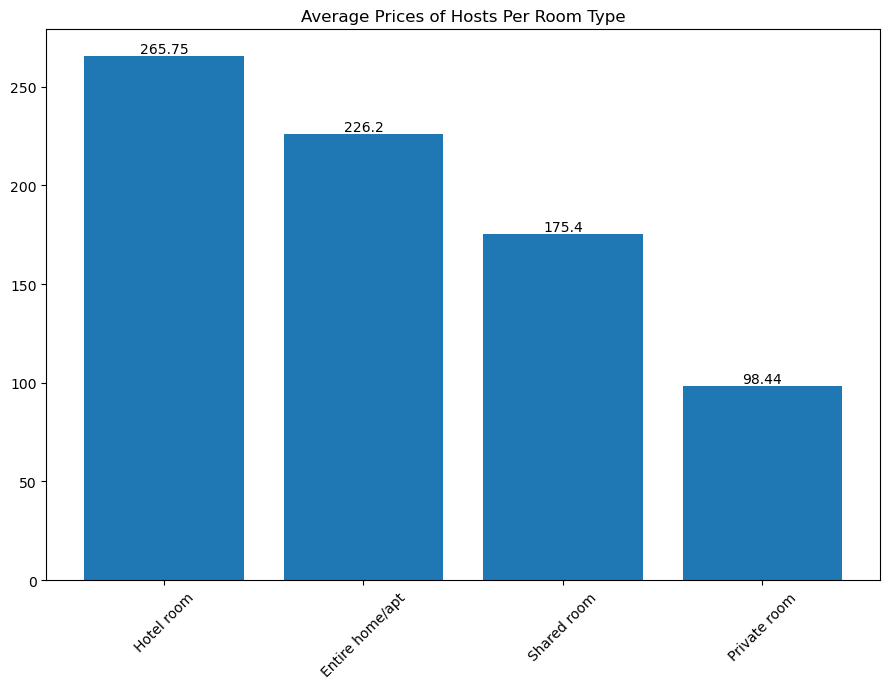

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

# 使用groupby计算每种房间类型的平均价格
data['price'] = data['price'].str.replace(',', '').str.replace('$', '').astype(float)  # 将 'price' 列的数据类型更改为浮点数
avg_prices = data.groupby('room_type')['price'].mean().reset_index(name='Avg_Prices')

# 按平均价格降序排序
avg_prices = avg_prices.sort_values(by='Avg_Prices', ascending=False)

# 创建柱状图
plt.figure(figsize=(9, 7))
plt.bar(avg_prices['room_type'], avg_prices['Avg_Prices'])

# 添加数据标签
for index, row in avg_prices.iterrows():
    plt.text(row['room_type'], row['Avg_Prices'], round(row['Avg_Prices'], 2), ha='center', va='bottom')

# 设置图表标题
plt.title("Average Prices of Hosts Per Room Type")

# 显示图表
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [160]:
# Save to a new CSV file
#在本地IDE中生成名为Clean_listings的数据清洗整理和评级后的csv

corrected_classified_file_name = 'Clean_listings.csv'
data.to_csv(corrected_classified_file_name, index=False)

# Print the file save path
print(f"Corrected classified listings file saved as: {corrected_classified_file_name}")


Corrected classified listings file saved as: Clean_listings.csv
